In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import astropy
import astropy.units as u
import corner
from astropy.cosmology import wpwaCDM

In [2]:
# Astropy.cosmology version
def Hz1(z1,H01,Om1,Ode1,wp1,wa1):
    #FLRW cosmology with a CPL dark energy equation of state, a pivot redshift, and curvature.
    cosmo =wpwaCDM(H0=H01* u.km / u.s / u.Mpc, Om0=Om1,Ode0=Ode1,wp=wp1,wa=wa1) 
    #the redshift dependence of the dark energy density:
    #Ode1=1-Om1
    I = cosmo.de_density_scale(z1)
    E = np.sqrt((Om1*(1+z1)**3.) + Ode1*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 6., num=num_zs)

In [4]:
#From Planck observations for CPL mode
O_m=0.3029
w_0=-0.9414
w_1=0.1
H_0=68.5265
O_de=0.701

In [5]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,O_de,w_0,w_1)/(1+zs)

In [6]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [7]:
H_zz= Hz + e1

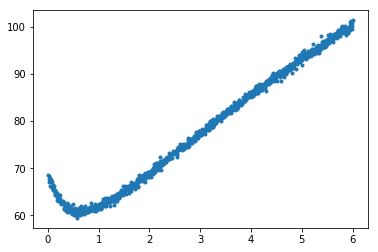

In [8]:
plt.plot(zs,H_zz, '.')

In [9]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('Ode1',0.7,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('wp1',-1.,True,-3.,3.),
           ('wa1',0.,True,0.,1.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['Ode1'],v['wp1'],v['wa1'])/(1+zs)-H_zz)/error_sigma

In [10]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 70
    # data points      = 1000
    # variables        = 5
    chi-square         = 1031.45625
    reduced chi-square = 1.03663944
    Akaike info crit   = 40.9716358
    Bayesian info crit = 65.5104122
[[Variables]]
    Om1:   0.29264017 +/- 1532.52772 (523690.14%) (init = 0.3)
    Ode1:  0.68045696 +/- 3563.48635 (523690.19%) (init = 0.7)
    H01:   69.7099666 +/- 182170.532 (261326.38%) (init = 70)
    wp1:  -0.95059324 +/- 0.01162084 (1.22%) (init = -1)
    wa1:   0.11715623 +/- 0.03526579 (30.10%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01)  = -1.000
    C(Ode1, H01) = -1.000
    C(Om1, Ode1) =  1.000
    C(wp1, wa1)  = -0.948


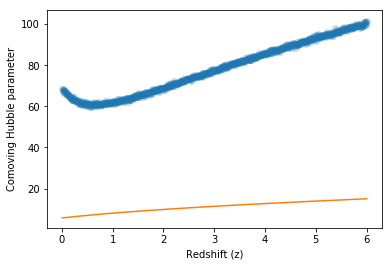

In [11]:
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='o',alpha=0.2)
bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestwp1 = mi.params.valuesdict()['wp1']
bestwa1 = mi.params.valuesdict()['wa1']
plt.plot(zs,Hz1(zs,bestOde1,bestH01,bestOm1,bestwp1,bestwa1)/(1+zs))
plt.plot(zs,Hz)
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Hubble parameter')
lmfit.report_fit(mi)